<a href="https://colab.research.google.com/github/arpitpandey2/basicneuralnetwork/blob/main/basicneuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [260]:
# Create our model
class Model(nn.Module):
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__()
    self.fc1= nn.Linear(in_features,h1)
    self.fc2= nn.Linear(h1,h2)
    self.out= nn.Linear(h2,out_features)

  def forward(self,x):
    x= f.relu(self.fc1(x))
    x= f.relu(self.fc2(x))
    x= self.out(x)

    return x

In [261]:
# Feed the data
torch.manual_seed(30)
mode1= Model()

In [262]:
# Load the data
url= 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df= pd.read_csv(url)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Replace objects to numbers, so to train easily
my_df['species']=my_df['species'].replace('setosa',0.0)
my_df['species']=my_df['species'].replace('versicolor',1.0)
my_df['species']=my_df['species'].replace('virginica',2.0)
my_df['species'] = my_df['species'].astype(int)
my_df

In [264]:
# Prepare data for splitting
X=my_df.drop('species',axis=1)
Y=my_df['species']
x=X.values
y=Y.values

In [265]:
x
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [266]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [267]:
# Split data into training and testing sets
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=40)

In [268]:
y_train.dtype

dtype('int64')

In [269]:
# Convert data to PyTorch tensors
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)

y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [270]:
# Define criterion and optimizer
criterion= nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(mode1.parameters(), lr=0.01)

In [271]:
# Train the model
epochs=100
losses=[]
for i in range(epochs):
  y_pred= mode1.forward(x_train)
  loss= criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())

  if i%10==0:
    print(f"Epoch: {i} and loss {loss}")

  # Backprop and optimize
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss 1.1645786762237549
Epoch: 10 and loss 1.0454981327056885
Epoch: 20 and loss 0.9063301682472229
Epoch: 30 and loss 0.6239821910858154
Epoch: 40 and loss 0.4346666932106018
Epoch: 50 and loss 0.31528720259666443
Epoch: 60 and loss 0.19815006852149963
Epoch: 70 and loss 0.11750739067792892
Epoch: 80 and loss 0.0828332006931305
Epoch: 90 and loss 0.06977424025535583


Text(0.5, 0, 'Epoch')

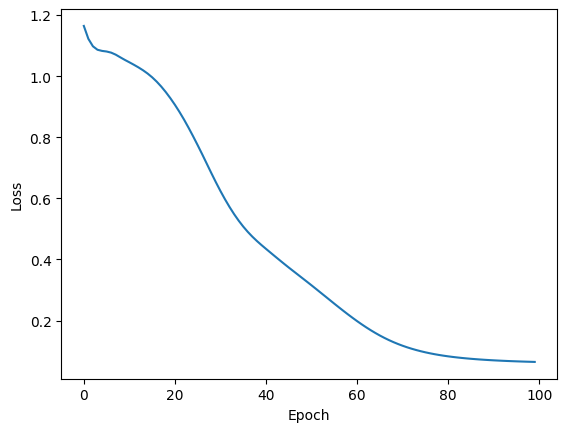

In [272]:
# Plot the loss
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [273]:
with torch.no_grad():
  y_eval= mode1.forward(x_test)
  loss= criterion(y_eval,y_test)
loss

tensor(0.0640)

In [279]:
correct= 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val= mode1.forward(data)
    print(f'{i+1:2}. {str(y_val):38} {y_test[i]}')
    if y_val.argmax().item()== y_test[i]:
      correct+=1

print(correct)

 1. tensor([10.6734,  4.9124, -9.0958])    0
 2. tensor([-2.2700,  4.6652,  3.0850])    1
 3. tensor([-5.3319,  2.7680,  7.4922])    2
 4. tensor([-6.4530,  3.1132,  8.9584])    2
 5. tensor([-1.1009,  5.3621,  1.4501])    1
 6. tensor([-6.3370,  1.9065,  8.9012])    2
 7. tensor([-2.4882,  4.5826,  3.4290])    1
 8. tensor([-1.2684,  5.3903,  1.6673])    1
 9. tensor([-2.5510,  4.2573,  3.4805])    1
10. tensor([ 12.3414,   5.6099, -10.4982]) 0
11. tensor([-1.8452,  4.7516,  2.4561])    1
12. tensor([11.2101,  5.3446, -9.6328])    0
13. tensor([ 12.1922,   5.5185, -10.3607]) 0
14. tensor([-3.3615,  4.1165,  4.6706])    2
15. tensor([ 2.3023,  6.0514, -2.2410])    1
16. tensor([-6.4640,  2.0770,  9.0980])    2
17. tensor([-3.6403,  3.9061,  5.0629])    2
18. tensor([-5.3850,  2.9999,  7.5072])    2
19. tensor([-1.4393,  6.2630,  1.8933])    1
20. tensor([-1.2402,  5.0973,  1.6598])    1
21. tensor([-6.4530,  1.5923,  9.0558])    2
22. tensor([-7.0984,  2.0852,  9.8900])    2
23. tensor